###Atividade 2 - ML Aplicado 2

Descrição da atividade: classificar o conjunto 20 newsgroup.
* Usar codificação binária para as palavras (ao invés de contagem).
* Utilizar as mesmas classes do exemplo para que os resultados sejam comparáveis.
* Escolher a versão mais apropriada do Naive Bayes para lidar com atributos binários.
* Testar diferentes configurações, por exemplo: com ou sem stop words, com ou sem o cabeçalho das notícias, etc.

####Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

####Carregando e Reduzindo o Dataset

In [2]:
data = fetch_20newsgroups()

In [3]:
#Descrição do dataset
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

Para simplificar, um subset de categorias de categorias foi definido em aula.

In [4]:
#Print das categorias
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
#Seleção de categorias específicas
categories = ['talk.religion.misc', 
              'soc.religion.christian',
              'sci.space', 
              'comp.graphics']

####Definindo Amostras de Treino e Teste

####Aplicando Vetorizador TF-IDF

A versão de algoritmo Naive Bayes escolhida para esta aplicação foi o BernoulliNB (`sklearn.naive_bayes.BernoulliNB`). Assim como o MultinomialNB, BernoulliNB é um classificador adequado para dados discretos. Porém, ao contrário do MultinomialNB, que trabalha com contagens de ocorrências, o BernoulliNB é projetado para recursos binários/booleanos.

Inicialmente foram utilizadas amostras de registros pertencentes a somente as categorias especificadas em `categories`. Não houve remoção de `headers` e/ou `footers` e/ou `quotes` das notícias contidas em 20newsgroups. 

Para os demais casos, pode ocorrer uma nova geração de conjuntos de treino e teste.

In [6]:
#Retorna os sets de treino e teste, respectivamente
def define_train_test_sets(cat, remover):
  return fetch_20newsgroups(subset='train', categories=cat, remove=remover), fetch_20newsgroups(subset='test', categories=cat, remove=remover)

In [7]:
#Definição dos conjuntos de treino e teste
train, test = define_train_test_sets(categories, ())

In [8]:
#Definição dos modelos utilizados
model1 = make_pipeline(TfidfVectorizer(), BernoulliNB()) #considerando stopwords
model2 = make_pipeline(TfidfVectorizer(stop_words='english'), BernoulliNB()) #desconsiderando stopwords

#####Caso 1

Conjunto de dados de treino e teste simples, sem remoções de partes de notícias. 

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(), 
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.63      0.96      0.76       389
           1       0.93      0.76      0.84       394
           2       0.81      0.84      0.82       398
           3       0.99      0.41      0.58       251

    accuracy                           0.78      1432
   macro avg       0.84      0.74      0.75      1432
weighted avg       0.83      0.78      0.77      1432



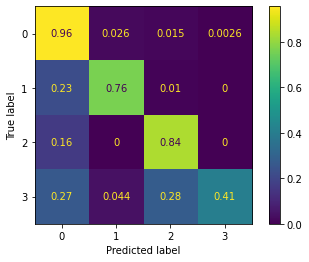

In [9]:
model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 2

Conjunto de dados de treino e teste simples, sem remoções de partes de notícias. O mesmo conjunto de dados do Caso 1.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'), 
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       389
           1       0.94      0.80      0.86       394
           2       0.83      0.88      0.85       398
           3       0.99      0.44      0.61       251

    accuracy                           0.81      1432
   macro avg       0.86      0.77      0.78      1432
weighted avg       0.85      0.81      0.80      1432



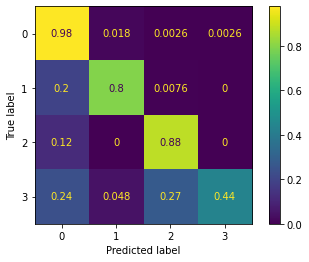

In [10]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 3

Conjunto de dados de treino e teste desconsiderando cabeçalhos, rodapés e citações contidas nas notícias.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.45      0.94      0.61       389
           1       0.90      0.51      0.65       394
           2       0.67      0.66      0.66       398
           3       1.00      0.02      0.03       251

    accuracy                           0.58      1432
   macro avg       0.76      0.53      0.49      1432
weighted avg       0.73      0.58      0.54      1432



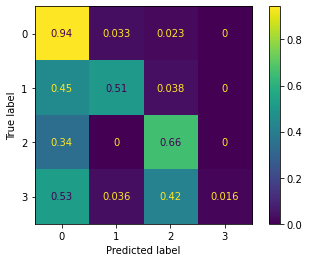

In [11]:
train, test = define_train_test_sets(categories, ('headers', 'footers', 'quotes'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 4

Conjunto de dados de treino e teste desconsiderando cabeçalhos, rodapés e citações contidas nas notícias. O mesmo conjunto de dados do Caso 3.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.48      0.96      0.64       389
           1       0.92      0.53      0.68       394
           2       0.70      0.74      0.72       398
           3       1.00      0.02      0.05       251

    accuracy                           0.62      1432
   macro avg       0.78      0.56      0.52      1432
weighted avg       0.75      0.62      0.57      1432



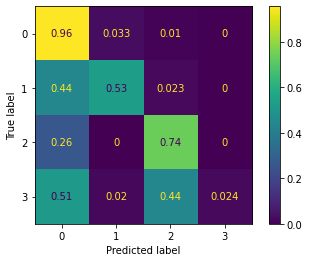

In [12]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 5

Conjunto de dados de treino e teste desconsiderando cabeçalhos e rodapés contidos nas notícias.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.55      0.94      0.70       389
           1       0.92      0.66      0.77       394
           2       0.73      0.78      0.76       398
           3       0.97      0.23      0.37       251

    accuracy                           0.70      1432
   macro avg       0.79      0.65      0.65      1432
weighted avg       0.78      0.70      0.68      1432



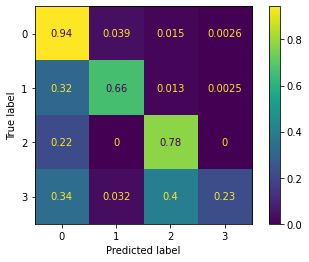

In [13]:
train, test = define_train_test_sets(categories, ('headers', 'footers'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 6

Conjunto de dados de treino e teste desconsiderando cabeçalhos e rodapés contidos nas notícias. O mesmo conjunto de dados do Caso 5.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       389
           1       0.94      0.66      0.78       394
           2       0.75      0.82      0.78       398
           3       0.97      0.25      0.39       251

    accuracy                           0.72      1432
   macro avg       0.81      0.67      0.67      1432
weighted avg       0.79      0.72      0.70      1432



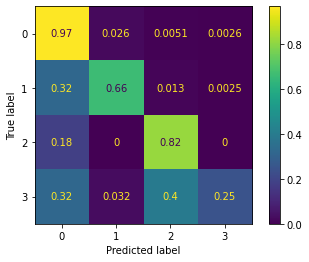

In [14]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 7

Conjunto de dados de treino e teste desconsiderando cabeçalhos e citações contidas nas notícias. 

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.55      0.94      0.70       389
           1       0.92      0.66      0.77       394
           2       0.73      0.78      0.76       398
           3       0.97      0.23      0.37       251

    accuracy                           0.70      1432
   macro avg       0.79      0.65      0.65      1432
weighted avg       0.78      0.70      0.68      1432



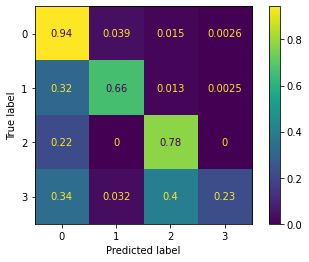

In [15]:
train, test = define_train_test_sets(categories, ('headers', 'footers'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 8

Conjunto de dados de treino e teste desconsiderando cabeçalhos e citações contidas nas notícias. O mesmo conjunto de dados do Caso 7. 

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       389
           1       0.94      0.66      0.78       394
           2       0.75      0.82      0.78       398
           3       0.97      0.25      0.39       251

    accuracy                           0.72      1432
   macro avg       0.81      0.67      0.67      1432
weighted avg       0.79      0.72      0.70      1432



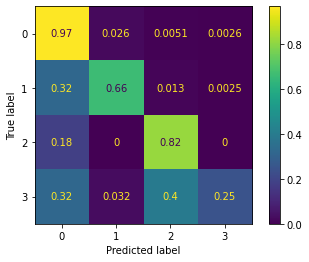

In [16]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 9

Conjunto de dados de treino e teste desconsiderando rodapés e citações contidas nas notícias. 

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.52      0.95      0.67       389
           1       0.92      0.65      0.77       394
           2       0.73      0.75      0.74       398
           3       1.00      0.13      0.23       251

    accuracy                           0.67      1432
   macro avg       0.79      0.62      0.60      1432
weighted avg       0.77      0.67      0.64      1432



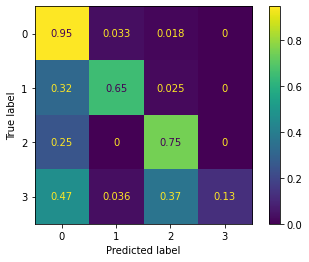

In [17]:
train, test = define_train_test_sets(categories, ('quotes', 'footers'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 10

Conjunto de dados de treino e teste desconsiderando rodapés e citações contidas nas notícias. O mesmo conjunto de dados do Caso 9.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.56      0.97      0.71       389
           1       0.95      0.70      0.81       394
           2       0.77      0.82      0.79       398
           3       0.95      0.16      0.27       251

    accuracy                           0.71      1432
   macro avg       0.81      0.66      0.64      1432
weighted avg       0.79      0.71      0.68      1432



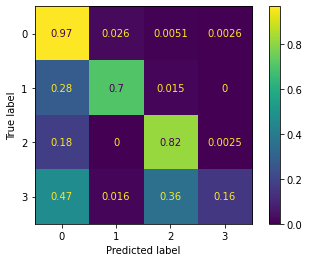

In [18]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 11

Conjunto de dados de treino e teste desconsiderando somente os rodapés contidos nas notícias. 

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.59      0.95      0.73       389
           1       0.94      0.73      0.82       394
           2       0.81      0.81      0.81       398
           3       0.98      0.41      0.58       251

    accuracy                           0.76      1432
   macro avg       0.83      0.73      0.74      1432
weighted avg       0.82      0.76      0.75      1432



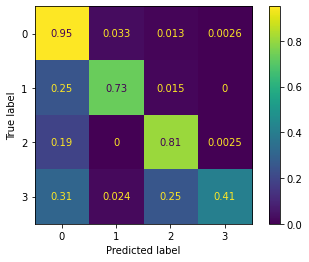

In [19]:
train, test = define_train_test_sets(categories, ('footers'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 12

Conjunto de dados de treino e teste desconsiderando somente os rodapés contidos nas notícias. O mesmo conjunto de dados do Caso 11.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       389
           1       0.95      0.78      0.86       394
           2       0.81      0.85      0.83       398
           3       0.98      0.40      0.57       251

    accuracy                           0.78      1432
   macro avg       0.85      0.75      0.76      1432
weighted avg       0.83      0.78      0.78      1432



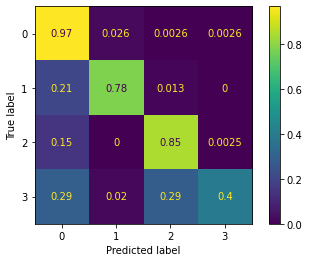

In [20]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 13

Conjunto de dados de treino e teste desconsiderando somente as citações contidas nas notícias. 

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.54      0.95      0.69       389
           1       0.93      0.69      0.79       394
           2       0.75      0.77      0.76       398
           3       0.98      0.16      0.28       251

    accuracy                           0.69      1432
   macro avg       0.80      0.65      0.63      1432
weighted avg       0.78      0.69      0.67      1432



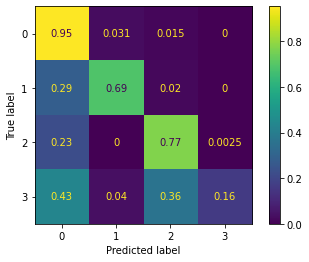

In [21]:
train, test = define_train_test_sets(categories, ('quotes'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 14

Conjunto de dados de treino e teste desconsiderando somente as citações contidas nas notícias. O mesmo conjunto de dados do Caso 13.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.61      0.97      0.75       389
           1       0.93      0.73      0.82       394
           2       0.78      0.89      0.83       398
           3       0.96      0.21      0.34       251

    accuracy                           0.75      1432
   macro avg       0.82      0.70      0.68      1432
weighted avg       0.81      0.75      0.72      1432



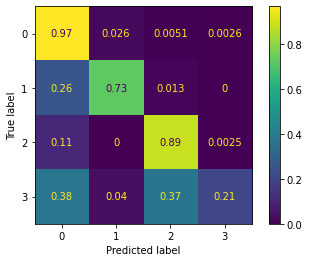

In [22]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

#####Caso 15

Conjunto de dados de treino e teste desconsiderando somente os cabeçalhos contidos nas notícias.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.59      0.95      0.73       389
           1       0.94      0.73      0.82       394
           2       0.75      0.81      0.78       398
           3       1.00      0.28      0.44       251

    accuracy                           0.73      1432
   macro avg       0.82      0.69      0.69      1432
weighted avg       0.80      0.73      0.72      1432



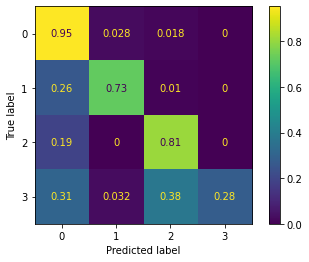

In [23]:
train, test = define_train_test_sets(categories, ('headers'))

model1.fit(train.data, train.target)

labels = model1.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model1, test.data, test.target, normalize='true' );

#####Caso 16

Conjunto de dados de treino e teste desconsiderando somente os cabeçalhos contidos nas notícias. O mesmo conjunto de dados do Caso 15.

Pipeline contendo os seguintes estimadores:
* TfidfVectorizer(stop_words='english'),
* BernoulliNB().

              precision    recall  f1-score   support

           0       0.62      0.97      0.75       389
           1       0.95      0.74      0.83       394
           2       0.77      0.84      0.80       398
           3       0.97      0.30      0.46       251

    accuracy                           0.75      1432
   macro avg       0.83      0.71      0.71      1432
weighted avg       0.81      0.75      0.74      1432



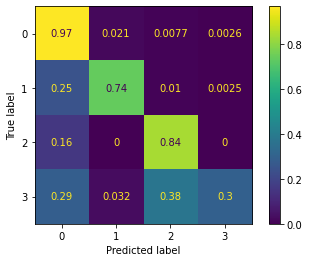

In [24]:
model2.fit(train.data, train.target)

labels = model2.predict(test.data)

print(classification_report(test.target, labels))
plot_confusion_matrix(model2, test.data, test.target, normalize='true' );

####Considerações Finais

Do modelo que não exclui stopwords, o Caso 1 é o que possui maior acurácia e melhores scores em sensibilidade (*recall*). Este caso não removeu cabeçalhos, rodapés e citações. 

Do modelo que exclui stopwords, o Caso 2 é o que teve melhor performance em acurácia e em sensibilidade (*recall*). Este caso também não removeu cabeçalhos, rodapés e citações. 

Em geral, o Caso 2 se saiu melhor que o Caso 1.